In [323]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime      # datatime 라이브러리 임포트
import calendar
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/aiffel/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [325]:
df = pd.DataFrame(data)
df.drop(['show_id','director'],axis=1)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [326]:
import plotly.express as px
P = df.groupby(['type']).size().reset_index(name='counts')
pieChart = px.pie(P, values='counts', names='type',
title='Distribution of Content Type on Netflix')
pieChart.show()

In [327]:
df['date_added'] = df['date_added'].apply(lambda x : pd.Timestamp(x))
df['Registered year'] = df['date_added'].apply(lambda x : x.year)

In [328]:
re_year = df.loc[df['release_year']>2005,['release_year']].astype('int')
as_year = df.loc[df['Registered year']>2005,['Registered year']].astype('int')

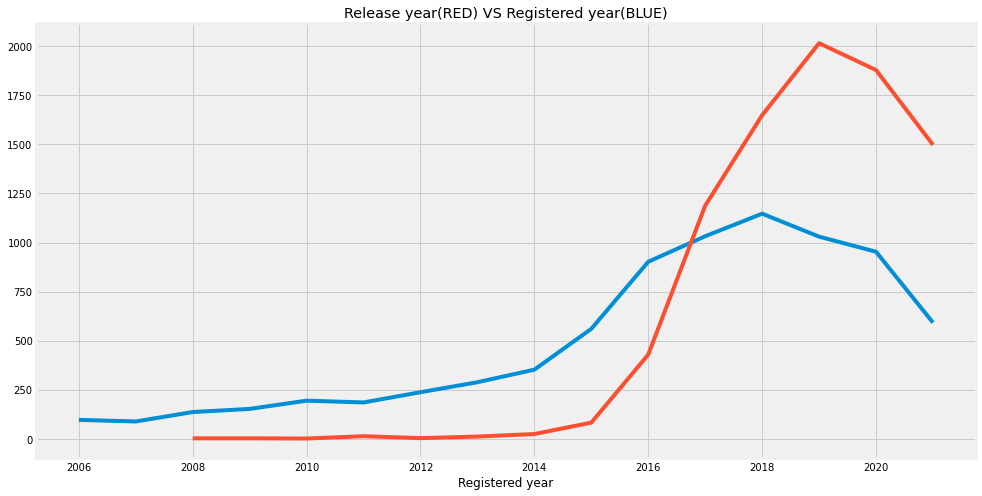

In [329]:
re_year.groupby('release_year')['release_year'].count().plot(kind='line',figsize=(15,8))
as_year.groupby('Registered year')['Registered year'].count().plot(kind='line',figsize=(15,8), title='Release year(RED) VS Registered year(BLUE)')

Text(0.5, 1.0, 'Distribution of Type on Release year')

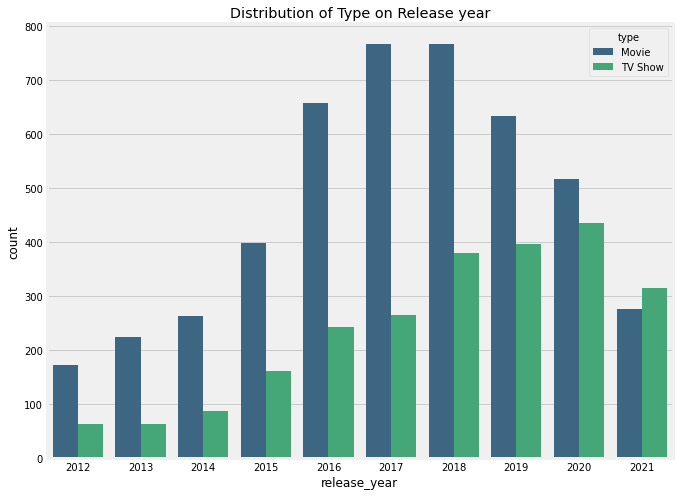

In [330]:
plt.figure(figsize=(10,8))
Release_years = df[["type","release_year"]]
Release_years = Release_years[Release_years["release_year"] >= 2012]
sns.countplot(x="release_year", data=Release_years, hue="type", palette="viridis")
plt.title("Distribution of Type on Release year")


**타입 : TV Show**

In [331]:
dataFilter_TV = df['type'] == 'TV Show'
df[dataFilter_TV]

df_TV = df[dataFilter_TV]
df_TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Registered year
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0


In [332]:
df_TV.isnull().sum()

show_id               0
type                  0
title                 0
director           2446
cast                350
country             391
date_added           10
release_year          0
rating                2
duration              0
listed_in             0
description           0
Registered year      10
dtype: int64

In [333]:
df_TV['country'].fillna("America",inplace =True,limit =79)
df_TV['country'].fillna("Africa",inplace =True,limit =78)
df_TV['country'].fillna("Asia",inplace =True,limit =78)
df_TV['country'].fillna("Europe",inplace =True,limit =78)
df_TV['country'].fillna("Oceania",inplace =True,limit =78)

In [334]:
df_TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Registered year
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",America,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,America,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",America,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0


In [335]:
a1=df_TV[(df_TV['country'].str.count(','))!=0]

In [336]:
a1.shape

(245, 13)

In [337]:
a1[0:49]['country']='America'
a1[49:98]['country']='Africa'
a1[98:147]['country']='Asia'
a1[147:196]['country']='Europe'
a1[196:]['country']='Oceania'

In [338]:
import plotly.express as px 

In [339]:
z1 = a1.groupby(['country']).size().reset_index(name='counts')
pieChart = px.pie(z1, values='counts', names='country',
title='Distribution of TV Show_null Country on Netflix')
pieChart.show()

In [340]:
df_TV.update(a1, overwrite=True)

In [341]:
def category_continent(x) :
  if x == ('Senegal')or x== ('South Africa')or x== ('Nigeria ')or x== ('Africa') :
    return 0
  elif x == ('Chile')or x== ('Argentina')or x== ('Colombia')or x== ('Brazil')or x== ('Mexico')or x== ('Canada')or x== ('America')or x== ('United States'):
    return 1
  elif x == ('United Arab Emirates')or x== ('Cyprus')or x== ('Philippines')or x== ('Kuwait')or x== ('Jordan')or x== ('Indonesia')or x== ('Saudi Arabia')or x== ('Hong Kong')or x== ('Pakistan')or x== ('Malaysia')or x== ('Lebanon')or x== ('Israel')or x== ('Russia')or x== ('Egypt')or x== ('Singapore')or x== ('Thailand')or x== ('Turkey')or x== ('China')or x== ('India')or x== ('Taiwan')or x== ('Asia')or x== ('South Korea')or x== ('Japan'):
    return 2
  elif x == ('Switzerland')or x== ('Luxembourg')or x== ('Finland')or x== ('Croatia')or x== ('Belarus')or x== ('Ukraine')or x== ('Netherlands')or x== ('Ireland')or x== ('Iceland')or x== ('Norway')or x== ('Poland')or x== ('Belgium')or x== ('Sweden')or x== ('Denmark')or x== ('Italy')or x== ('Germany')or x== ('France')or x== ('Spain')or x== ('Europe')or x== ('United Kingdom'):
    return 3
  else :
    return 4

In [342]:
df_TV['Continent'] = df_TV['country'].apply(category_continent)

In [343]:

df_TV.drop(['country'],axis=1)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Registered year,Continent
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021-09-24,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",2018-05-01,2015.0,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,4
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",2017-01-17,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,2
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",2018-09-13,2016.0,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,4
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",2016-12-15,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,2


In [344]:
df_TV.loc[(df_TV.rating=='TV-14'),'rating'] = 14
df_TV.loc[(df_TV.rating=='TV-MA'),'rating'] = 19
df_TV.loc[(df_TV.rating=='TV-PG'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y7'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-G'),'rating'] = 0
df_TV.loc[(df_TV.rating=='NR'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y7-FV'),'rating'] = 0
df_TV.loc[(df_TV.rating=='R'),'rating'] = 0

In [345]:
df1=df_TV[['rating','Continent']]
df1=df1.rename(columns={"Continent": "Continent"})
df2=df1.groupby(['Continent','rating']).size().reset_index(name='count')
fig3 = px.line(df2, x="Continent", y="count", color='rating',title='Trend of TV_Show rating produced over the continent on Netflix')
fig3.show()

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

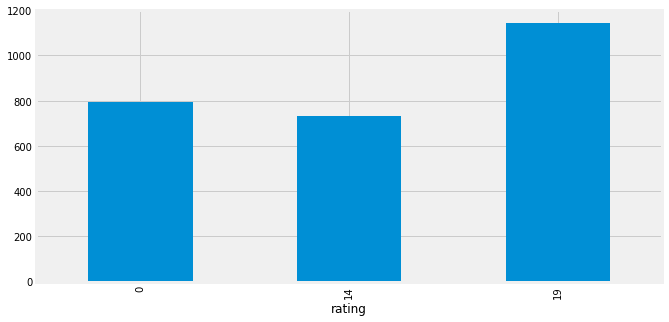

In [347]:
df_TV.groupby('rating')['Continent'].count().plot(kind='bar', figsize=(10,5))
plt.show()

In [348]:
df_TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Registered year,Continent
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,19,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",America,2021-09-24,2021.0,19,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,America,2021-09-24,2021.0,19,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,19,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",America,2021-09-24,2021.0,19,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,1


**텔레비전 방송 프로그램의 시청등급**

- TV-14 : 14세 이상의 청소년들을 위한 프로그램

- TV-MA : 17세 이하의 어린이나 청소년들에게 맞지 않는 프로그램

- TV-PG : 부모가 정확히 내용을 알고 보여주라는 프로그램

- TV-Y : 모든 어린이의 시청이 가능한 프로그램

- TV-Y7 : 7세 이상의 어린이들을 대상으로 한 프로그램

- TV-G : 모든 연령층이 볼 수 있는 프로그램

___

**타입 : Movie**

In [349]:
dataFilter_Movie = df['type'] == 'Movie'
df[dataFilter_Movie]

df_Movie = df[dataFilter_Movie]
df_Movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Registered year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0


In [350]:
df_Movie.isnull().sum()

show_id              0
type                 0
title                0
director           188
cast               475
country            440
date_added           0
release_year         0
rating               2
duration             3
listed_in            0
description          0
Registered year      0
dtype: int64

In [351]:
df_Movie['country'].fillna("America",inplace =True,limit =88)
df_Movie['country'].fillna("Africa",inplace =True,limit =88)
df_Movie['country'].fillna("Asia",inplace =True,limit =88)
df_Movie['country'].fillna("Europe",inplace =True,limit =88)
df_Movie['country'].fillna("Oceania",inplace =True,limit =88)

In [352]:
a2=df_Movie[(df_Movie['country'].str.count(','))!=0]

In [353]:
a2.shape

(1075, 13)

In [354]:
a2[0:215]['country']='America'
a2[215:430]['country']='Africa'
a2[430:645]['country']='Asia'
a2[645:860]['country']='Europe'
a2[860:]['country']='Oceania'

In [355]:
z2 = a2.groupby(['country']).size().reset_index(name='counts')
pieChart = px.pie(z2, values='counts', names='country',
title='Distribution of Movie_null Country on Netflix')
pieChart.show()

In [356]:
df_Movie.update(a2, overwrite=True)

In [357]:
df_Movie['Continent'] = df_Movie['country'].apply(category_continent)

In [358]:
df_Movie.drop(['country'],axis=1)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Registered year,Continent
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021.0,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-09-24,2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021-09-23,2021.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",2016-03-09,2015.0,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,4
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2019-11-20,2007.0,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2019-11-01,2009.0,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,1
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006.0,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1


In [359]:
df_Movie.loc[(df_Movie.rating=='TV-14'),'rating'] = 14
df_Movie.loc[(df_Movie.rating=='TV-MA'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='TV-PG'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-Y'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-Y7'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-G'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='NR'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='TV-Y7-FV'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='R'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='G'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='PG'),'rating'] = 14
df_Movie.loc[(df_Movie.rating=='PG-13'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='UR'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='NC-17'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='66 min'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='74 min'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='84 min'),'rating'] = 0

In [360]:
df3=df_Movie[['rating','Continent']]
df3=df3.rename(columns={"Continent": "Continent"})
df4=df3.groupby(['Continent','rating']).size().reset_index(name='count')
fig5 = px.line(df4, x="Continent", y="count", color='rating',title='Trend of Movie rating produced over the Continent on Netflix')
fig5.show()

**영화의 시청등급**

- G : 모든 연령층의 관객들이 볼 수 있는 영화

- PG : 어린이 청소년들의 시청여부를 판단해야 하는 영화

- PG-13 : 13세 이상의 청소년들이 볼 수 있는 영화

- R : 18세 이상의 성인들을 위한 영화

- TV-14 : 14세 이상의 청소년들을 위한 영화

- TV-G : 모든 연령층이 볼 수 있는 영화

- TV-MA : 17세 이하의 어린이나 청소년들에게 맞지 않는 영화

- TV-PG : 부모가 정확히 내용을 알고 보여주라는 영화

- TV-Y : 모든 어린이의 시청이 가능한 영화

- TV-Y7 : 7세 이상의 어린이들을 대상으로 하는 영화

- NR : 미성년자 관람이 불가한 영화 

- NC-17 : 18세 이상의 성인들을 위한 영화(17세 이하의 청소년들은 시청 불가)

- TV-Y7-FV : 틴 에이저나 청소년들을 위한 영화

- UR : 미성년자 관람이 불가한 영화